project presentation link:https://drive.google.com/file/d/1AAZAsfkJUQcgO-Eu3vb0aeXT5I6X4ECl/view?usp=sharing

#Data Importing

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
data = pd.read_csv('/content/Engineering_graduate_salary.csv', index_col=0)
data.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,,,,,,,,,,,,,,,,,,,,,
604399,f,22-10-1990,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
988334,m,15-05-1990,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
301647,m,21-08-1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
582313,m,04-05-1991,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
339001,f,30-10-1990,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 604399 to 993701
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   DOB                    2998 non-null   object 
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   object 
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   object 
 7   CollegeID              2998 non-null   int64  
 8   CollegeTier            2998 non-null   int64  
 9   Degree                 2998 non-null   object 
 10  Specialization         2998 non-null   object 
 11  collegeGPA             2998 non-null   float64
 12  CollegeCityID          2998 non-null   int64  
 13  CollegeCityTier        2998 non-null   int64  
 14  CollegeState           2998 non-null   object 
 1

In [ ]:
data.describe()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [ ]:
data.isnull().sum()

Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].value_counts())

m    2282
f     716
Name: Gender, dtype: int64
03-07-1991    7
31-07-1991    6
10-12-1990    6
07-10-1990    6
08-08-1990    6
             ..
23-04-1991    1
10-07-1991    1
03-03-1990    1
15-04-1987    1
24-11-1988    1
Name: DOB, Length: 1633, dtype: int64
78.00    60
76.00    53
80.00    52
87.00    51
82.00    51
         ..
77.53     1
61.30     1
72.83     1
77.65     1
69.30     1
Name: 10percentage, Length: 736, dtype: int64
cbse                            1026
state board                      881
0                                256
icse                             213
ssc                               96
                                ... 
maharashtra state board,pune       1
up board , allahabad               1
mirza ahmed ali baig               1
aurangabad board                   1
karnataka education board          1
Name: 10board, Length: 221, dtype: int64
2009    793
2008    702
2010    548
2007    394
2006    311
2005    127
2004     54
2011     31
2003     17
2002 

In [ ]:
data.shape

(2998, 33)

In [ ]:
data.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,,,,,,,,,,,,,,,,,,,,,
604399,f,22-10-1990,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
988334,m,15-05-1990,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
301647,m,21-08-1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
582313,m,04-05-1991,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
339001,f,30-10-1990,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


#Data Cleaning

In [ ]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data["Gender"] = data["Gender"].replace({'m': 0, 'f': 1})

In [ ]:
data.replace(to_replace=-1, value=0,inplace=True)

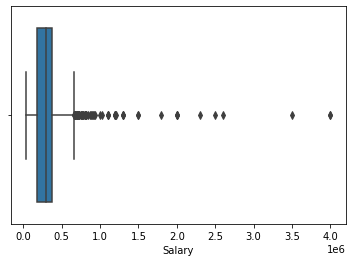

In [ ]:
sns.boxplot(x=data.Salary)

In [ ]:
def remove_outlier_Hampel(data):
    med=data.median()
    List=abs(data-med)
    cond=List.median()*4.5
    good_list=List[~(List>cond)]
    return good_list

In [ ]:
data_outlier_removed=remove_outlier_Hampel(data.Salary)
data_outlier_removed=pd.DataFrame(data_outlier_removed)
ind_diff=data.index.difference(data_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    data_final=data.drop([ind_diff[i]])
    data=data_final

In [ ]:
print(data)

        Gender         DOB  10percentage                       10board  \
ID                                                                       
604399       1  22-10-1990         87.80                          cbse   
988334       0  15-05-1990         57.00                          cbse   
301647       0  21-08-1989         77.33  maharashtra state board,pune   
582313       0  04-05-1991         84.30                          cbse   
339001       1  30-10-1990         82.00                          cbse   
...        ...         ...           ...                           ...   
103174       1  17-04-1989         75.00                             0   
352811       1  22-07-1991         84.00                   state board   
287070       0  24-11-1988         91.40                         bsemp   
317336       0  25-08-1988         88.64     karnataka education board   
993701       0  27-05-1992         77.00                   state board   

        12graduation  12percentage   

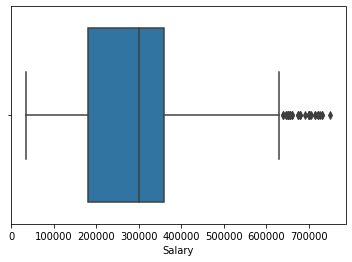

In [ ]:
sns.boxplot(x=data.Salary)

#EDA

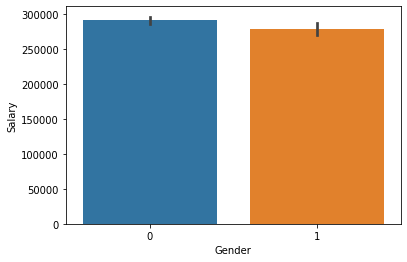

In [ ]:
sns.barplot(x='Gender',y='Salary',data=data)

Text(0.5, 1.0, 'Bar Plot of Degree with Salary')

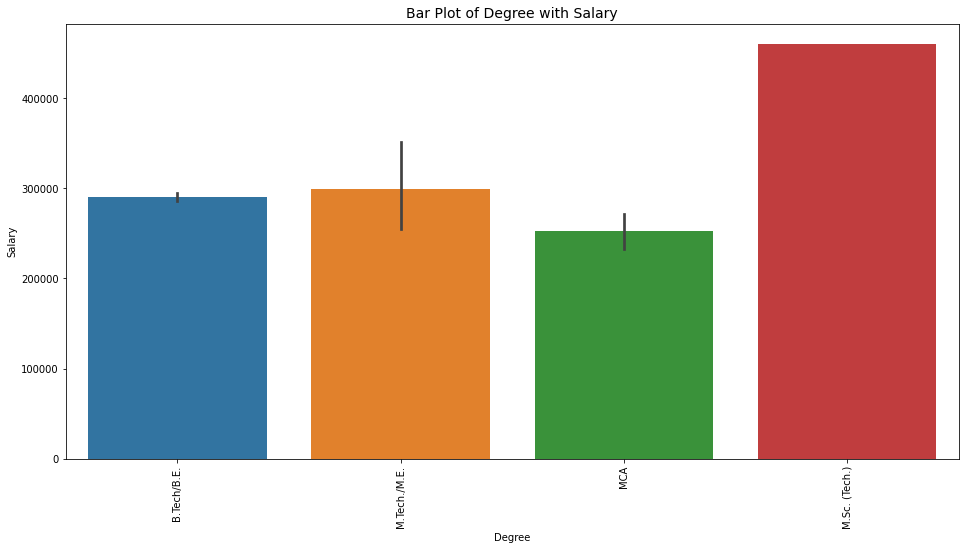

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.barplot(x=data["Degree"],y=data["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of Degree with Salary", fontsize=14)

#Another Method application

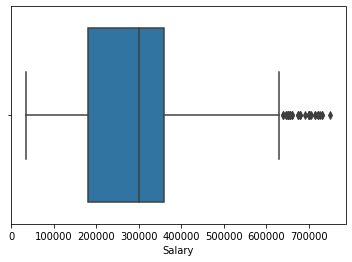

In [ ]:
 sns.boxplot(x=data.Salary)

This can be because of Outliers outliers are the points in the dataset which show high deviation from most of the data.

To make it a more normalised distribution we can remove Outliers

We can remove outliers using various algorithms and technique

Here I am going to use Z-Score Z-Score is the how much times the standard deviation a point is deviated from the mean value. We will replace the values that are very largely deviated with the median value.

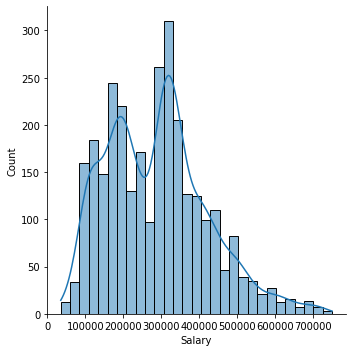

In [ ]:
plot = sns.displot(data=data["Salary"], kde=True)

In [ ]:
from scipy.stats import zscore
from numpy import where,abs,median,nan,sqrt

In [ ]:
  data["Salary"] = data["Salary"].replace([data["Salary"][(abs(zscore(data["Salary"])) > 3)]], median(data["Salary"]))

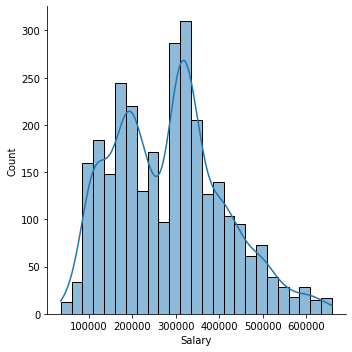

In [ ]:
plot = sns.displot(data=data["Salary"], kde=True)

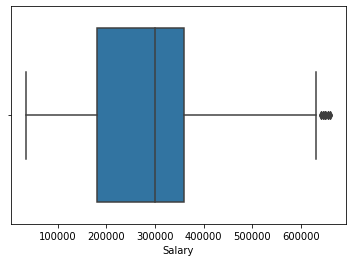

In [ ]:
 sns.boxplot(x=data.Salary)

In [ ]:
data['Specialization'].value_counts()

electronics and communication engineering      664
computer science & engineering                 550
information technology                         501
computer engineering                           400
computer application                           198
electronics and electrical engineering         146
mechanical engineering                         146
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               23
electronics and instrumentation engineering     18
information science engineering                 18
instrumentation and control engineering         17
civil engineering                               14
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

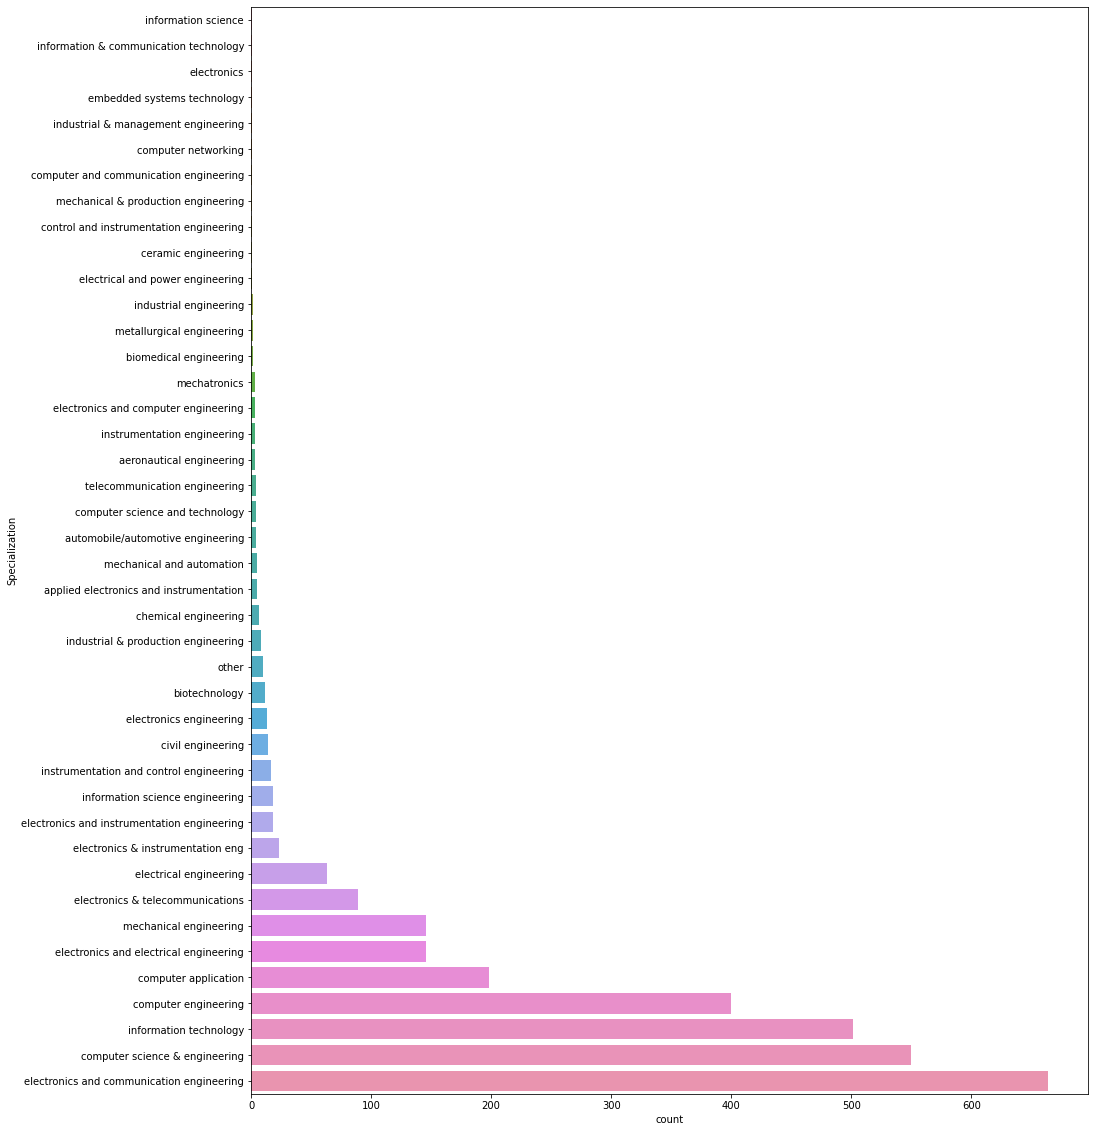

In [ ]:
plt.figure(figsize = (15,20))
sns.countplot(y='Specialization',data=data,order=data['Specialization'].value_counts().sort_values().index)

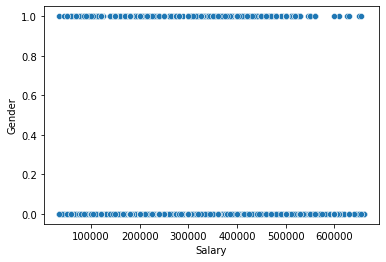

In [ ]:
sns.scatterplot(x=data.Salary, y=data.Gender)

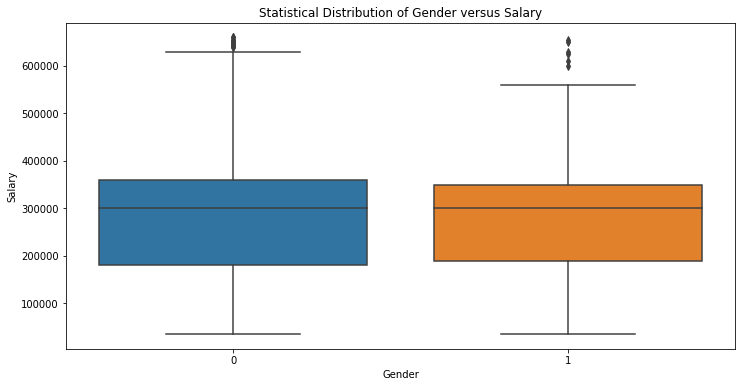

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['Gender'], y=data['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

It is clearly visible from the plot that the Average salary for man and woman are looking almost same.

In [ ]:
data['CollegeState'].value_counts()

Uttar Pradesh        685
Karnataka            276
Tamil Nadu           262
Telangana            244
Maharashtra          185
Andhra Pradesh       172
West Bengal          143
Madhya Pradesh       141
Punjab               138
Haryana              135
Orissa               129
Rajasthan            124
Delhi                119
Uttarakhand           81
Kerala                24
Chhattisgarh          17
Gujarat               17
Jharkhand             17
Himachal Pradesh      13
Bihar                  8
Union Territory        5
Jammu and Kashmir      5
Assam                  4
Sikkim                 2
Meghalaya              1
Goa                    1
Name: CollegeState, dtype: int64

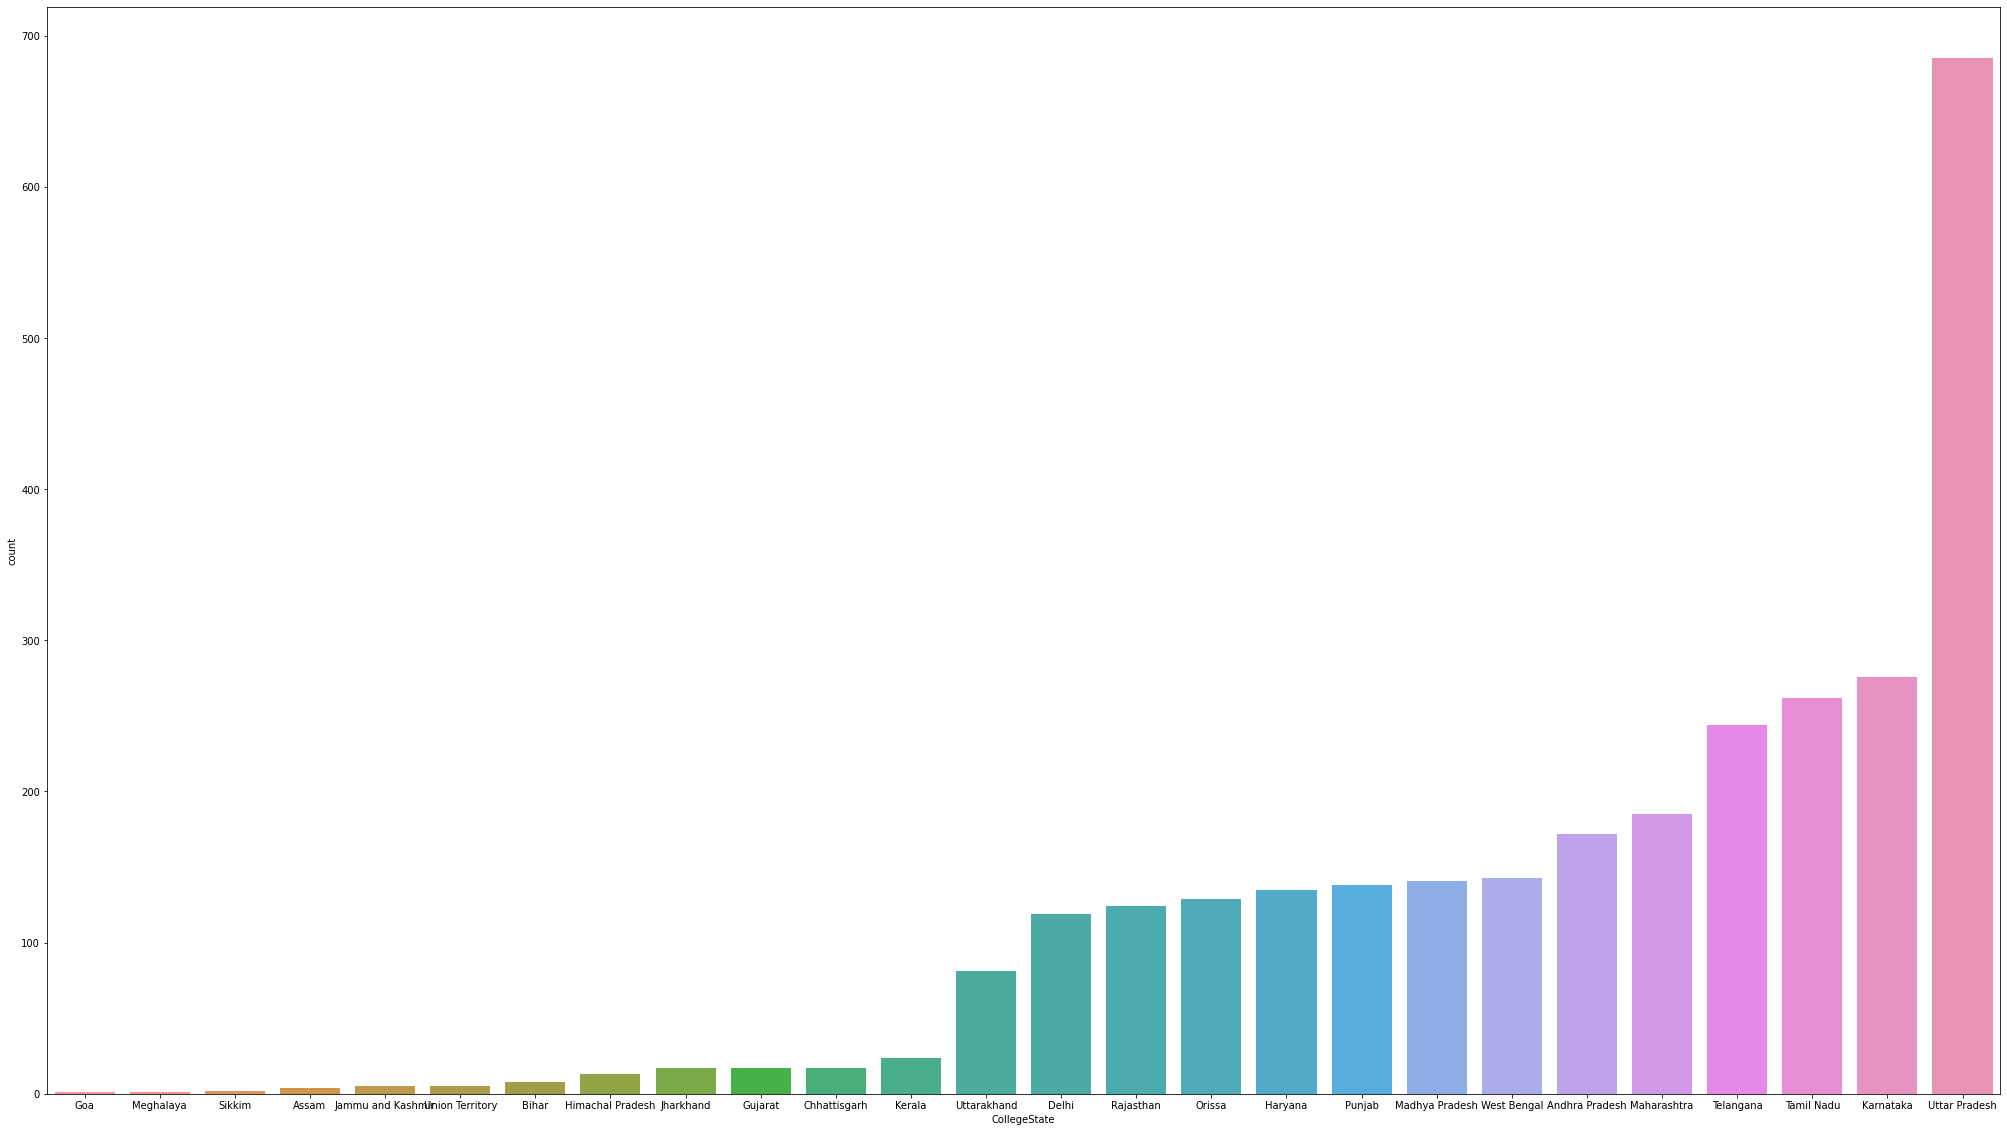

In [ ]:
plt.figure(figsize = (35,20))
sns.countplot(x='CollegeState',data=data,order=data['CollegeState'].value_counts().sort_values().index)

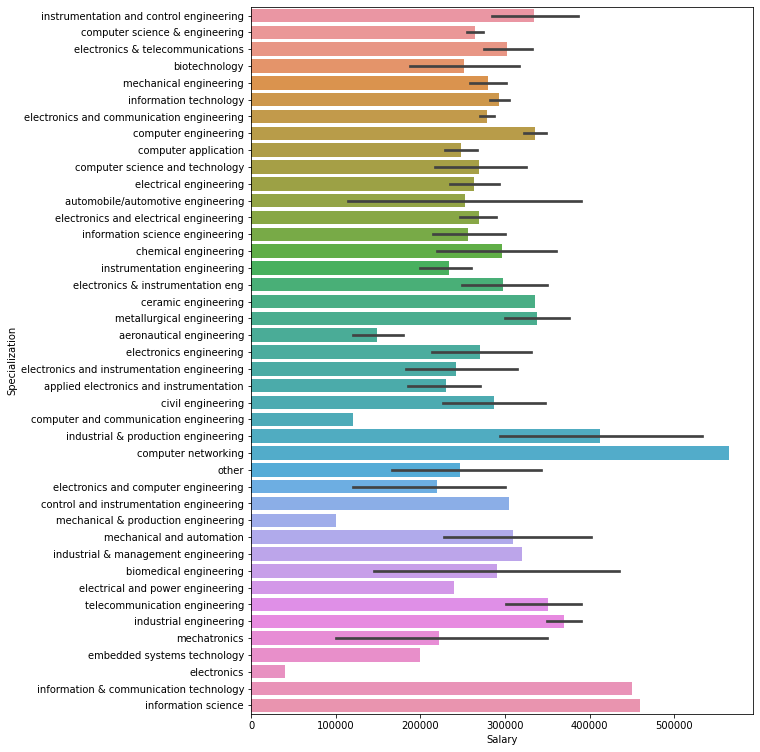

In [ ]:
plt.figure(figsize = (9,13))
sns.barplot(y='Specialization',x='Salary',data=data)

In [ ]:
data['Degree'].value_counts()

B.Tech/B.E.      2712
MCA               197
M.Tech./M.E.       38
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [ ]:
a=data.groupby('Degree')['Salary'].mean()

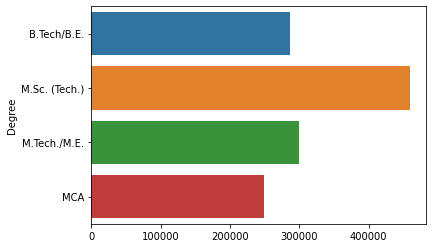

In [ ]:
sns.barplot(x=a.values,y=a.index)

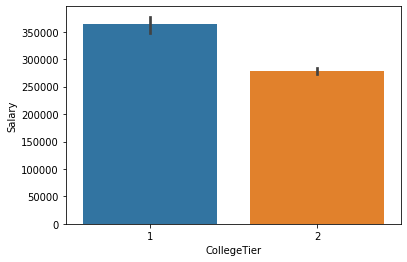

In [ ]:
sns.barplot(x = 'CollegeTier', y ='Salary', data = data)

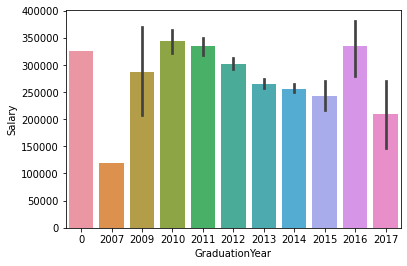

In [ ]:
sns.barplot(x = 'GraduationYear', y ='Salary', data = data)

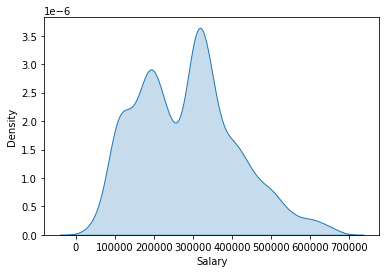

In [ ]:
sns.kdeplot(data['Salary'],shade=True)

**Analysis of 10th and 12th percentage by college tier**

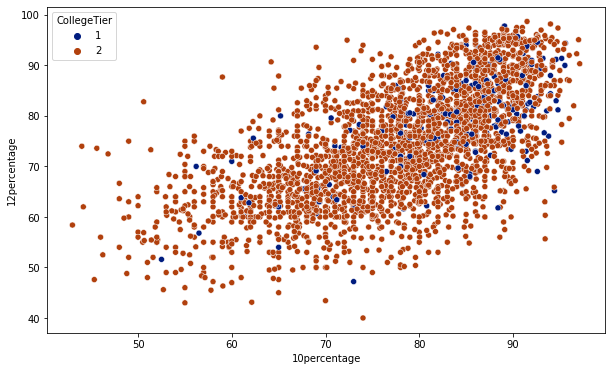

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = '10percentage', y = '12percentage', hue = 'CollegeTier',palette='dark', data = data)
plt.show()

According to correlation plot and scatterplot, we can see that 10th and 12th are positively correlated, this is the case of multicollinearity so I have decided to keep only one.

In [ ]:
 
df = data.copy()
# count of unique categories in specialization
value_count = data['Specialization'].value_counts()

def map_to_other_specialization(var):
    if var in value_count[value_count<=10]:
        return 'other'
    else:
        return var
    
# apply the function to specialization to get the results    
data['Specialization'] = data.Specialization.apply(map_to_other_specialization)

 if count of unique category is less than 10, replace the category as other 

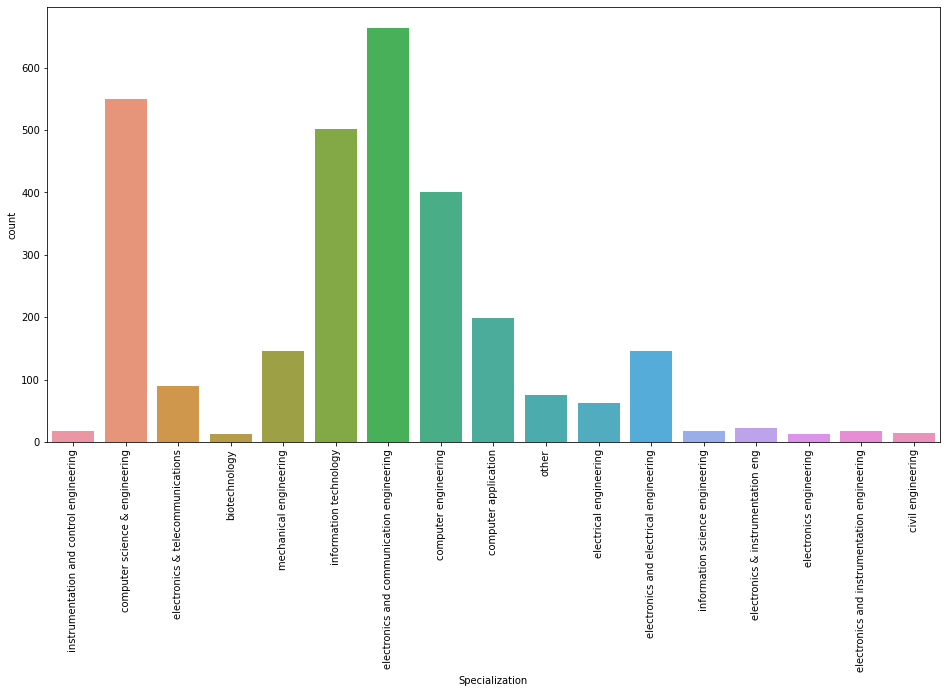

In [ ]:
plt.figure(figsize = (16, 8))
total = float(len(data))
p = sns.countplot(x='Specialization',data=data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category
data['Specialization'] = data['Specialization'].str.replace('electronics & instrumentation eng',\
                                                'electronics and instrumentation engineering')

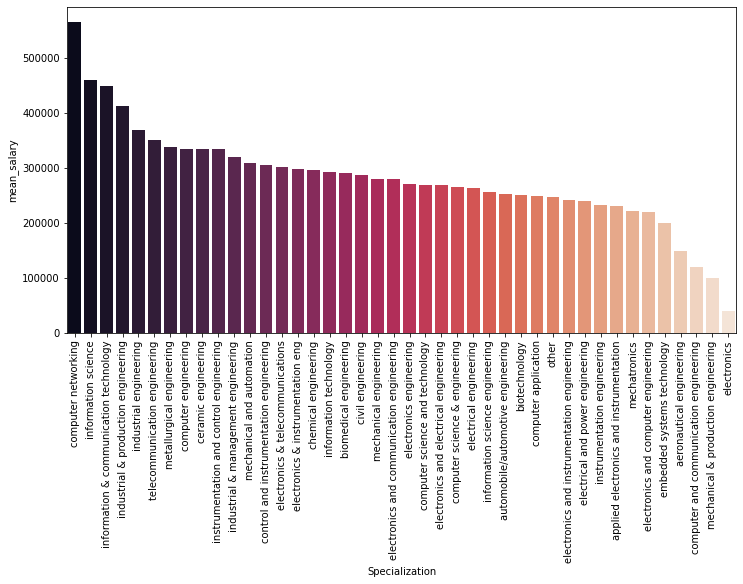

In [ ]:
avg_sal_per_specialization = df.groupby('Specialization').agg(mean_salary =("Salary", 'mean')).sort_values(by = 'mean_salary',ascending=False)

# barplot of mean salary and specialization
plt.figure(figsize = (12, 6))
sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')
plt.xticks(rotation = 90)
plt.show()

ICE Engineer, Computer Engineer and Electronics Engineer having highest mean salary

**Analysis of Salary and College GPA**

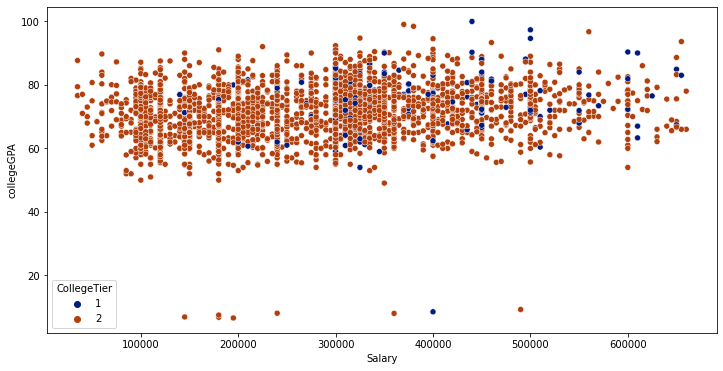

In [ ]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x ='Salary', y = 'collegeGPA',hue='CollegeTier',data=df,palette = 'dark')
plt.show()

In [ ]:
data = data.loc[(data['collegeGPA'] > 40) & (data['Salary'] < 1500000)]

In [ ]:
data.shape

(2940, 33)

**Analysis of Salary and Degree**

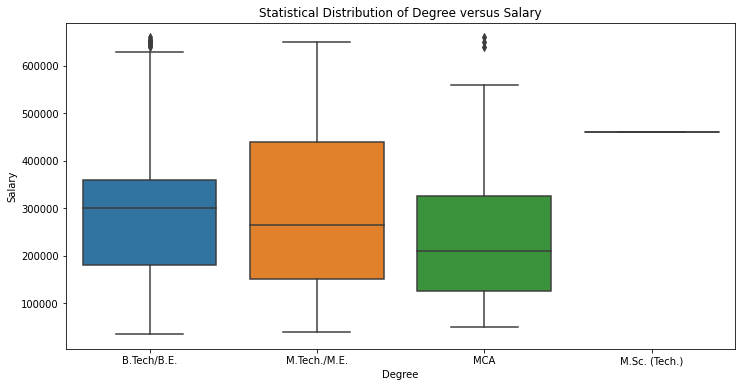

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['Degree'], y=data['Salary'] )

plt.title('Statistical Distribution of Degree versus Salary')
plt.show()

In [ ]:
data['Degree'].value_counts()

B.Tech/B.E.      2705
MCA               197
M.Tech./M.E.       37
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

Average salary is highest for BE/B.tech graduates as compared to any other degree graduates.

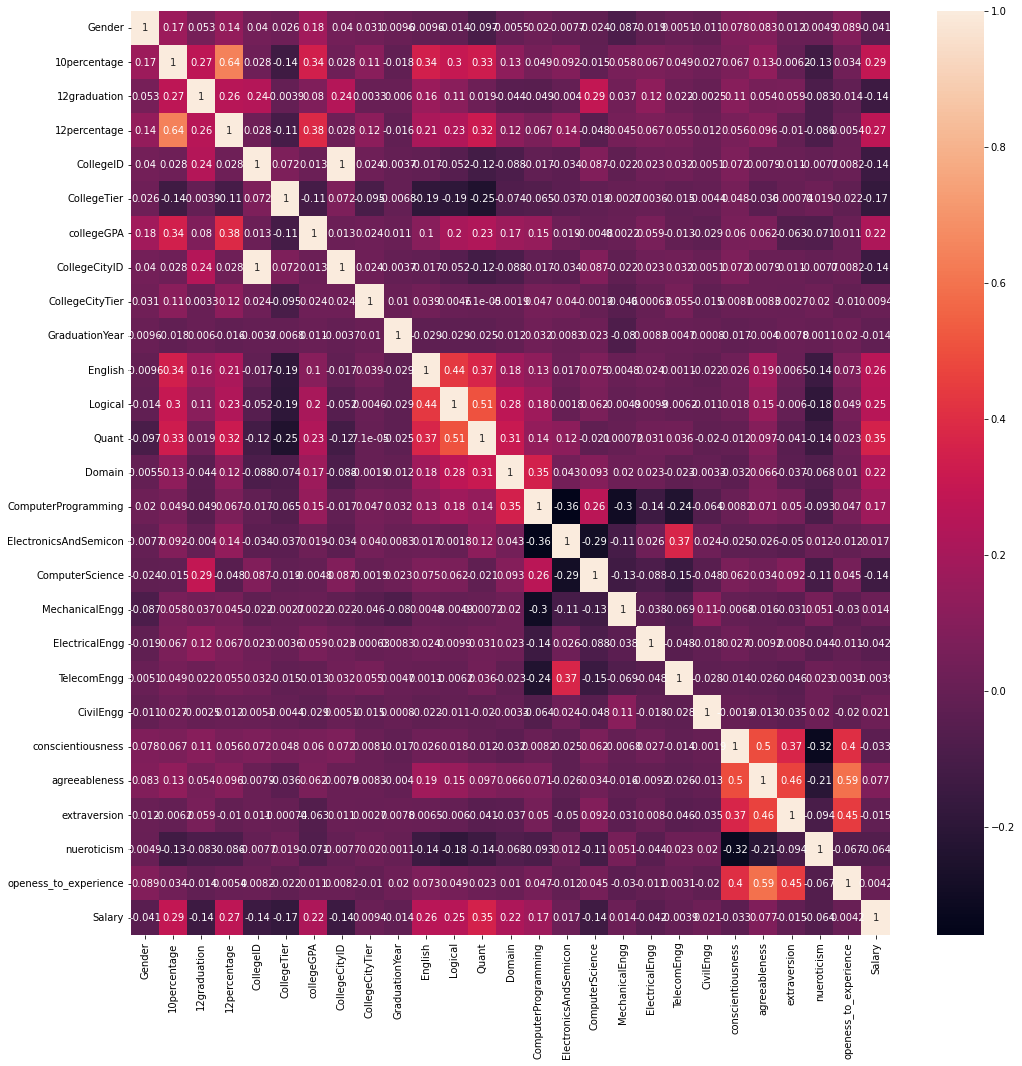

In [ ]:
plt.figure(figsize = (17,17))
ax=sns.heatmap(data.corr(),annot=True)

In [ ]:
data.drop(['CollegeID', '10board','12graduation','12board' ,'CollegeCityID','CollegeState', 'CollegeCityTier','DOB'], axis = 1, inplace = True)

In [ ]:
data = pd.get_dummies(data, columns=["Degree"])

In [ ]:
data = pd.get_dummies(data, columns=["Specialization"])

In [ ]:
# Split df into dependent(y) and indepedent variables(X)
X = data.drop('Salary',axis=1)
y = data['Salary']

In [ ]:
X

,Gender,10percentage,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,...,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_instrumentation engineering,Specialization_mechanical & production engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_mechatronics,Specialization_metallurgical engineering,Specialization_other,Specialization_telecommunication engineering
ID,,,,,,,,,,,,,,,,,,,,,
604399,1,87.80,84.00,1,73.82,2013,650,665,810,0.694479,...,0,1,0,0,0,0,0,0,0,0
988334,0,57.00,64.50,2,65.00,2014,440,435,210,0.342315,...,0,0,0,0,0,0,0,0,0,0
301647,0,77.33,85.17,2,61.94,2011,485,475,505,0.824666,...,0,0,0,0,0,0,0,0,0,0
582313,0,84.30,86.00,1,80.40,2013,675,620,635,0.990009,...,0,0,0,0,0,0,0,0,0,0
339001,1,82.00,75.00,2,64.30,2012,575,495,365,0.278457,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103174,1,75.00,73.00,2,70.00,2010,505,485,445,0.538387,...,0,0,0,0,0,0,0,0,0,0
352811,1,84.00,77.00,2,75.20,2012,345,585,395,0.190153,...,1,0,0,0,0,0,0,0,0,0
287070,0,91.40,65.56,2,73.19,2011,385,425,485,0.600057,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

Gender                                                        0
10percentage                                                  0
12percentage                                                  0
CollegeTier                                                   0
collegeGPA                                                    0
GraduationYear                                                0
English                                                       0
Logical                                                       0
Quant                                                         0
Domain                                                        0
ComputerProgramming                                           0
ElectronicsAndSemicon                                         0
ComputerScience                                               0
MechanicalEngg                                                0
ElectricalEngg                                                0
TelecomEngg                             

#Ratio1 Linear regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
#importing Linear regression from sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

1558754.0201834238
-151.90952442913937


In [ ]:
print(reg.intercept_)
print(reg.coef_)

45997288.76848449
[-2.45747046e+04  1.54842025e+03  1.04075681e+03 -3.97976276e+04
  2.03081917e+03 -2.29228334e+04  1.55133866e+02  5.35157094e+01
  1.55150985e+02  1.74214313e+04  3.73952393e+01 -1.87564344e+01
 -6.39860416e+01  4.48033263e+01 -2.65528438e+01  1.31172261e+01
  2.11755710e+02 -2.28536505e+03  1.53519323e+03  6.49289191e+03
 -1.18090321e+03 -4.81662729e+03 -5.28288534e+04  1.14740330e+05
 -3.86128437e+04 -2.32986324e+04 -3.44527733e+04 -4.91843250e+04
 -2.32986324e+04  3.01383950e+04  1.24740689e+04 -2.25234314e+04
  1.23866954e+04  1.92519846e+03 -1.48133032e+03 -6.86322726e+03
  5.28986586e+04  1.81993425e+04  2.08302109e+04  8.44262935e+03
 -8.89765558e+03 -1.05938239e+04]


In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

137905.42490452674

In [ ]:
lm1 = smf.ols(formula='Salary~English+Quant+Logical+Domain+conscientiousness+agreeableness+ extraversion+nueroticism +openess_to_experience ', data=data).fit()

# print the coefficients
lm1.params

Intercept                22507.582927
English                    147.146620
Quant                      262.549037
Logical                     53.468178
Domain                   44529.116128
conscientiousness        -6054.516248
agreeableness             7363.818544
extraversion               382.599709
nueroticism               -477.366377
openess_to_experience    -3542.498621
dtype: float64

In [ ]:
feature_cols = ['English','Quant','Logical','Domain','conscientiousness','agreeableness','extraversion','nueroticism' ,'openess_to_experience']
X = data[feature_cols]
y = data.Salary

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

22507.582927246433
[  147.14661984   262.54903656    53.46817756 44529.11612845
 -6054.51624829  7363.81854413   382.59970939  -477.3663766
 -3542.49862092]


In [ ]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     61.92
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          2.87e-104
Time:                        05:39:32   Log-Likelihood:                -38455.
No. Observations:                2940   AIC:                         7.693e+04
Df Residuals:                    2930   BIC:                         7.699e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.251e+04   1.43e+04      1.572      0.116   -5559.086    5.06e+04
English                 147.1466     23.335      6.306      0.000     101.393     192.901
Quant                   262.5490     21.379     12.281      0.000     220.630     304.468
Logical                  53.4682     30.709      1.741      0.082      -6.745     113.681
Domain                 4.453e+04   7585.957      5.870      0.000    2.97e+04    5.94e+04
conscientiousness     -6054.5162   2590.447     -2.337      0.019   -1.11e+04    -975.235
agreeableness          7363.8185   3131.376      2.352      0.019    1223.898    1.35e+04
extraversion            382.5997   2629.170      0.146      0.884   -4772.609    5537.808
nueroticism            -477.3664   2296.384     -0.208      0.835   -4980.056    4025.323
openess_to_experience -3542.4986   2756.398     -1.285      0.199   -8947.172    1862.175
==============================================================================
Omnibus:                      115.262   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.107
Skew:                           0.503   Prob(JB):                     1.52e-28
Kurtosis:                       3.178   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred = reg.predict(X_test)

print(sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

1558754.0201834238
-151.90952442913937


#Ratio2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
lm2=LinearRegression()   
lm2.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

119200.76085799764
0.1528559121211408


In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

93489.35395680943

#Ratio3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
lm3=LinearRegression()   
lm3.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

117677.50763578707
0.14705815151473633


In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

91973.1910966249

#Ratio4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
lm4=LinearRegression()   
lm4.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm4.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

118623.93608562632
0.1579621142948472


In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

93001.60005450547

#**Neural Networks**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
tf.random.set_seed(55)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 94020.5156 - mae: 94020.5156


[94020.515625, 94020.515625]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 643
Trainable params: 643
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

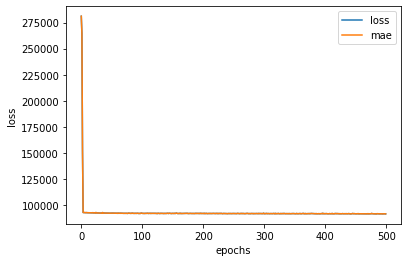

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(65)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=600, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 94340.7344 - mae: 94340.7344


[94340.734375, 94340.734375]

Text(0.5, 0, 'epochs')

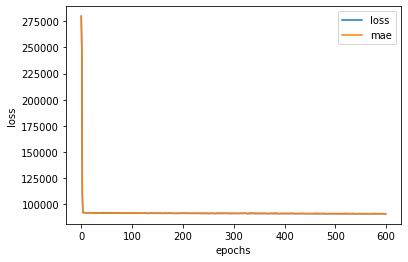

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(65)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=600, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
tf.random.set_seed(65)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 93993.6484 - mae: 93993.6484


[93993.6484375, 93993.6484375]

In [ ]:
tf.random.set_seed(65)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
tf.random.set_seed(95)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 93821.4453 - mae: 93821.4453


[93821.4453125, 93821.4453125]

In [ ]:
tf.random.set_seed(95)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
tf.random.set_seed(95)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(18),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=800, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 93947.5234 - mae: 93947.5234


[93947.5234375, 93947.5234375]

In [ ]:
tf.random.set_seed(95)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(18),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=800, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
tf.random.set_seed(80)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(15),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 93815.2109 - mae: 93815.2109


[93815.2109375, 93815.2109375]

In [ ]:
tf.random.set_seed(80)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(15),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
tf.random.set_seed(55)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 91953.3516 - mae: 91953.3516


[91953.3515625, 91953.3515625]

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 8)                 80        
                                                                 
 dense_46 (Dense)            (None, 5)                 45        
                                                                 
 dense_47 (Dense)            (None, 3)                 18        
                                                                 
 dense_48 (Dense)            (None, 1)                 4         
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

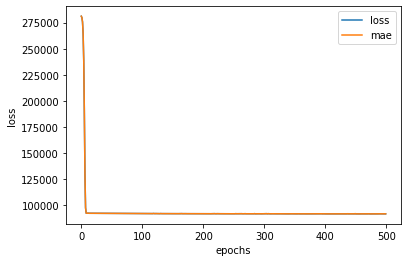

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(55)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=400, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

Text(0.5, 0, 'epochs')

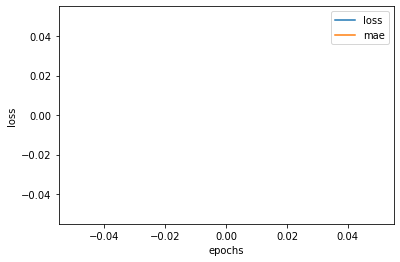

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(90)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(20),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=2000, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 91597.9844 - mae: 91597.9844


[91597.984375, 91597.984375]

Text(0.5, 0, 'epochs')

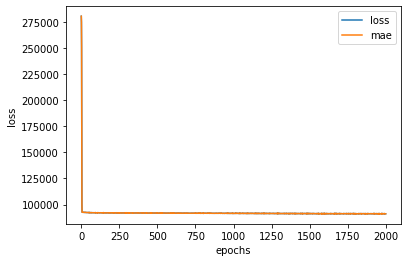

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(90)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(20),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
tf.random.set_seed(65)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model1.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model1.fit(X_train, y_train, epochs= 3000, verbose=0)

In [ ]:
model1.evaluate(X_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 91706.4141 - mae: 91706.4141


[91706.4140625, 91706.4140625]

Text(0.5, 0, 'epochs')

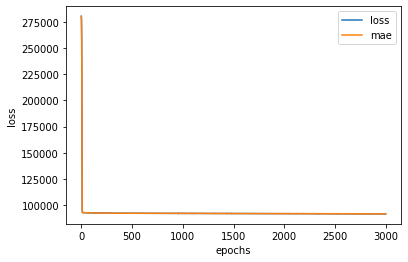

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(65)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model1.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model1.fit(X_train, y_train, epochs= 1500, verbose=0)

In [ ]:
model1.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 93134.6562 - mae: 93134.6562


[93134.65625, 93134.65625]

In [ ]:
tf.random.set_seed(65)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model1.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model1.fit(X_train, y_train, epochs= 600, verbose=0)

In [ ]:
model1.evaluate(X_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 91989.6328 - mae: 91989.6328


[91989.6328125, 91989.6328125]

Text(0.5, 0, 'epochs')

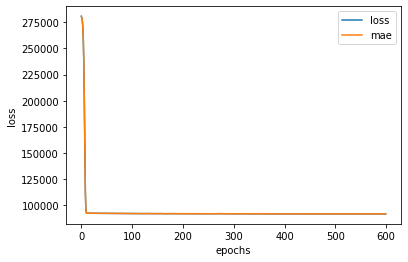

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(82)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 600, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 91960.9766 - mae: 91960.9766


[91960.9765625, 91960.9765625]

Text(0.5, 0, 'epochs')

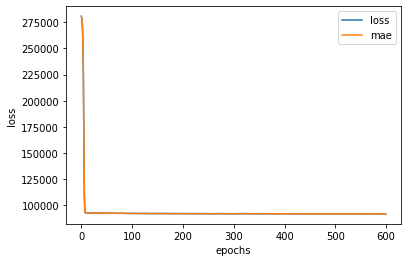

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(82)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 400, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 92000.8594 - mae: 92000.8594


[92000.859375, 92000.859375]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
tf.random.set_seed(60)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 60, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 93275.0938 - mae: 93275.0938


[93275.09375, 93275.09375]

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 8)                 80        
                                                                 
 dense_81 (Dense)            (None, 4)                 36        
                                                                 
 dense_82 (Dense)            (None, 2)                 10        
                                                                 
 dense_83 (Dense)            (None, 1)                 3         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

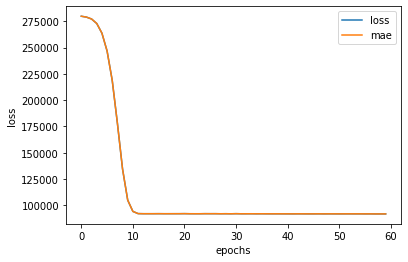

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
tf.random.set_seed(66)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 60, verbose=0)

Text(0.5, 0, 'epochs')

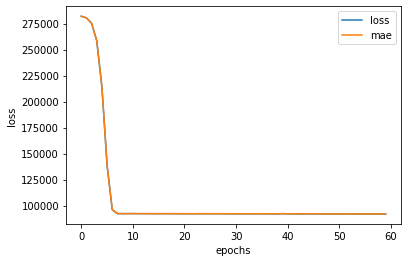

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 94089.2656 - mae: 94089.2656


[94089.265625, 94089.265625]

In [ ]:
tf.random.set_seed(66)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 60, verbose=0)

Text(0.5, 0, 'epochs')

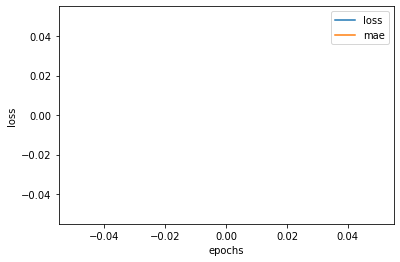

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:

tf.random.set_seed(55)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])                            

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 600, verbose=0)

Text(0.5, 0, 'epochs')

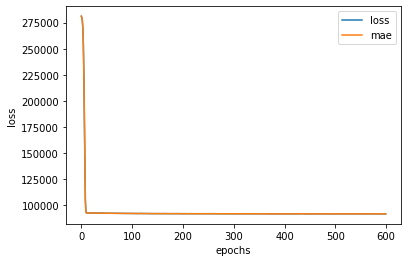

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 91911.7812 - mae: 91911.7812


[91911.78125, 91911.78125]

In [ ]:
tf.random.set_seed(92)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])                            

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 91876.1797 - mae: 91876.1797


[91876.1796875, 91876.1796875]

In [ ]:
tf.random.set_seed(55)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
]) 

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 800, verbose=0)

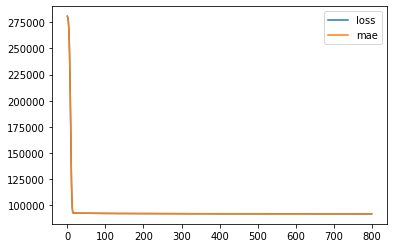

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 91968.3516 - mae: 91968.3516


[91968.3515625, 91968.3515625]

In [ ]:
tf.random.set_seed(55)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 400,verbose=0)

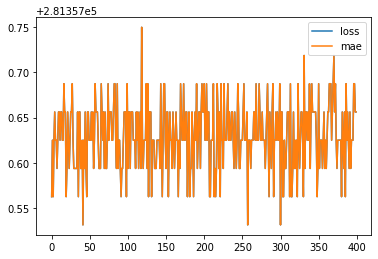

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 291649.6250 - mae: 291649.6250


[291649.625, 291649.625]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
tf.random.set_seed(95)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 1000,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 1ms/step - loss: 92912.6250 - mae: 92912.6250


[92912.625, 92912.625]

In [ ]:
tf.random.set_seed(80)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                           
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 800,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 92916.8906 - mae: 92916.8906


[92916.890625, 92916.890625]

In [ ]:
tf.random.set_seed(80)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(20),
                           
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 800,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 92865.4688 - mae: 92865.4688


[92865.46875, 92865.46875]

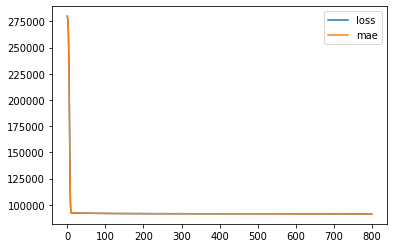

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 20)                200       
                                                                 
 dense_113 (Dense)           (None, 10)                210       
                                                                 
 dense_114 (Dense)           (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
tf.random.set_seed(80)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                           
                            tf.keras.layers.Dense(18),
                            tf.keras.layers.Dense(11),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 800,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 92603.4453 - mae: 92603.4453


[92603.4453125, 92603.4453125]

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 24)                240       
                                                                 
 dense_116 (Dense)           (None, 18)                450       
                                                                 
 dense_117 (Dense)           (None, 11)                209       
                                                                 
 dense_118 (Dense)           (None, 5)                 60        
                                                                 
 dense_119 (Dense)           (None, 2)                 12        
                                                                 
 dense_120 (Dense)           (None, 1)                 3         
                                                                 
Total params: 974
Trainable params: 974
Non-trainable

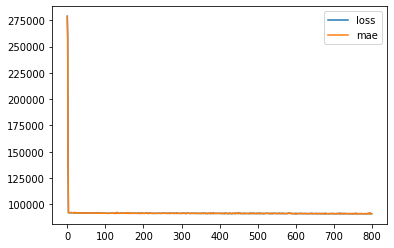

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.random.set_seed(40)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                           
                            tf.keras.layers.Dense(20),
                            tf.keras.layers.Dense(15),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 1200,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 92270.1953 - mae: 92270.1953


[92270.1953125, 92270.1953125]

In [ ]:
tf.random.set_seed(60)
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 92920.6719 - mae: 92920.6719


[92920.671875, 92920.671875]

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(50),
                            tf.keras.layers.Dense(40),
                            tf.keras.layers.Dense(30),
                            tf.keras.layers.Dense(20),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history=model.fit(X_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 93403.9844 - mae: 93403.9844


[93403.984375, 93403.984375]

Text(0.5, 0, 'epochs')

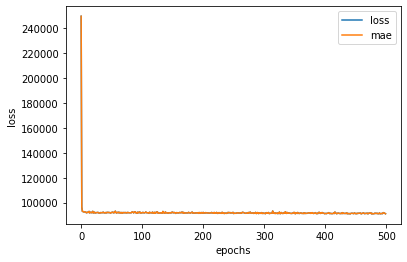

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor

#Bagging

##Bagging Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
clf = BaggingRegressor(n_estimators = 100, random_state = 0)

In [ ]:
a = clf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, a.predict(X_test))
mae

94824.04761904762

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
clf = BaggingRegressor(n_estimators = 100, random_state = 0)

In [ ]:
a = clf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, a.predict(X_test))
mae

92739.88662131519

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
clf = BaggingRegressor(n_estimators = 100, random_state = 0)

In [ ]:
a = clf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, a.predict(X_test))
mae

93150.40816326531

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
clf = BaggingRegressor(n_estimators = 100, random_state = 0)

In [ ]:
a = clf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, a.predict(X_test))
mae

93758.92517006803

##Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

95177.45817961286

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

95133.1503900012

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

96296.33256810055

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=50)
b = tree.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

95019.70233799175


##Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 40)

In [ ]:
c = rf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, c.predict(X_test))
mae

93183.97108843537

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 40)
c = rf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, c.predict(X_test))
mae

94383.4693877551

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 40)
c = rf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, c.predict(X_test))
mae

92889.95464852608

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 40)
c = rf.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, c.predict(X_test))
mae

94236.12244897959

#Boosting

##Adaboosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01, random_state=0)

In [ ]:
d = adaboost.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, d.predict(X_test))
mae

92492.67824749

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01, random_state=0)

In [ ]:
d = adaboost.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, d.predict(X_test))
mae

93917.87464215072

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01, random_state=0)

In [ ]:
d = adaboost.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, d.predict(X_test))
mae

93830.78736488809

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01, random_state=0)

In [ ]:
d = adaboost.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, d.predict(X_test))
mae

92201.85736731272

##Gradient Boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost= GradientBoostingRegressor(max_depth=5,learning_rate=0.01,random_state=0,n_estimators=1000)
e = grad_boost.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, e.predict(X_test))
mae


91502.92750170076

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost= GradientBoostingRegressor(max_depth=5,learning_rate=0.01,random_state=0,n_estimators=1000)
e = grad_boost.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, e.predict(X_test))
mae

91654.51334072048

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost= GradientBoostingRegressor(max_depth=5,learning_rate=0.01,random_state=0,n_estimators=1000)
e = grad_boost.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, e.predict(X_test))
mae

93531.5627757599

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost= GradientBoostingRegressor(max_depth=5,learning_rate=0.01,random_state=0,n_estimators=1000)
e = grad_boost.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, e.predict(X_test))
mae

92380.45954768731

##XGboosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_boost=xgb.XGBRegressor(random_state=50,learning_rate=0.01,n_estimators=700)
f = xgb_boost.fit(X_train, y_train)

[08:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mae = metrics.mean_absolute_error(y_test, f.predict(X_test))
mae

91894.45147746599

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_boost=xgb.XGBRegressor(random_state=50,learning_rate=0.01,n_estimators=700)
f = xgb_boost.fit(X_train, y_train)

[08:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mae = metrics.mean_absolute_error(y_test, f.predict(X_test))
mae

90676.26512896825

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_boost=xgb.XGBRegressor(random_state=50,learning_rate=0.01,n_estimators=700)
f = xgb_boost.fit(X_train, y_train)

[08:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mae = metrics.mean_absolute_error(y_test, f.predict(X_test))
mae

92553.95048761692

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_boost=xgb.XGBRegressor(random_state=50,learning_rate=0.01,n_estimators=700)
f = xgb_boost.fit(X_train, y_train)

[08:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mae = metrics.mean_absolute_error(y_test, f.predict(X_test))
mae

92353.62725340136